# Segmenting and clustring Neighborhoods of Toronto

In [3]:
# installing and importing required libraries
!pip install -U numpy
!pip install -U pandas
!pip install -U scipy
!pip install -U scikit-learn
!pip install -U imbalanced-learn
!pip install folium
!pip install sklearn
!pip install beautifulsoup4
!pip install lxml
import requests
import pandas as pd
import numpy as np
import random
#!conda install -c conda-forgegeopy --yes
from geopy.geocoders import Nominatim
from IPython.display import HTML
from IPython.display import display_html
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
!conda install -c conda-forgefolium=0.5.0 --yes
!pip install folium
import folium
from bs4 import BeautifulSoup
from sklean.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Folium installed')
print('Libraries imported')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: numpy in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.21.0)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_f

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes

CondaValueError: too few arguments, must supply command line package specs or --file

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


ModuleNotFoundError: No module named 'sklean'

In [26]:
!pip install -U numpy
!pip install -U pandas
!pip install -U scipy
!pip install -U scikit-learn
!pip install -U imbalanced-learn
!pip install folium
!pip install sklearn
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium
!pip install sklearn
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: numpy in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.21.0)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_f

In [27]:
url= 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969'

In [28]:
source=requests.get(url).text
soup=BeautifulSoup(source, 'lxml')
print(soup.title)
from IPython.display import display_html
tab=str(soup.table)
display_html(tab, raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [29]:
dfs=pd.read_html(tab)
df=dfs[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


data preprocessing and cleaning

In [30]:
# drop rows where Borough is not assigned
df1=df[df.Borough != 'Not assigned']
# combine neigborhoods with same postal codes
df2=df1.groupby(['Postal Code', 'Borough'], sort=False).agg(','.join)
df2.reset_index(inplace=True)
# replacing the name of the neighbourhoods which are not assihned with name Borough
df2['Neighbourhood']=np.where(df2['Neighbourhood']=='Not assigned', df2['Borough'], df2['Neighbourhood'])
df2

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [31]:
#take a look to the size of dataframe
df2.shape

(103, 3)

In [32]:
# rename postal code column
df2.rename(columns={'Postal Code':'Postcode'}, inplace=True)
df2.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [33]:
# importing the csv file containing the latitudees and longitudes for various neghbourhoods
lat_lng=pd.read_csv('https://cocl.us/Geospatial_data')
lat_lng.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merging the Two tables for getting the Latitudes and Longitudes Coordinated for all Neighbourhoods

In [34]:
lat_lng.rename(columns={'Postal Code': 'Postcode'}, inplace=True)
df3=pd.merge(df2, lat_lng, on='Postcode')
df3.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Clustring and Ploting the Neighbourhoods of Canada which Contain Toronto:

Getting all Rows from the dataframe which contains Toronto Borough

In [35]:
df4= df3[df3['Borough'].str.contains('Toronto', regex=False)]
df4

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


Mapping the Toronto Neighbourhoods

In [54]:
!conda install -c conda-forgefolium=0.5.0 --yes
!pip install folium
import folium
from IPython.display import HTML, display
import folium


CondaValueError: too few arguments, must supply command line package specs or --file

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [59]:
map_toronto=folium.Map(location=[43.651070, -79.347015], zoom_start=10)
for lat, lng, borough, neighbourhood in zip(df4['Latitude'], df4['Longitude'], df4['Borough'], df4['Neighbourhood']):
        label= '{}, {}'.format(neighbourhood, borough)
        label=folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7, parse_html=False).add_to(map_toronto)

In [60]:
map_toronto

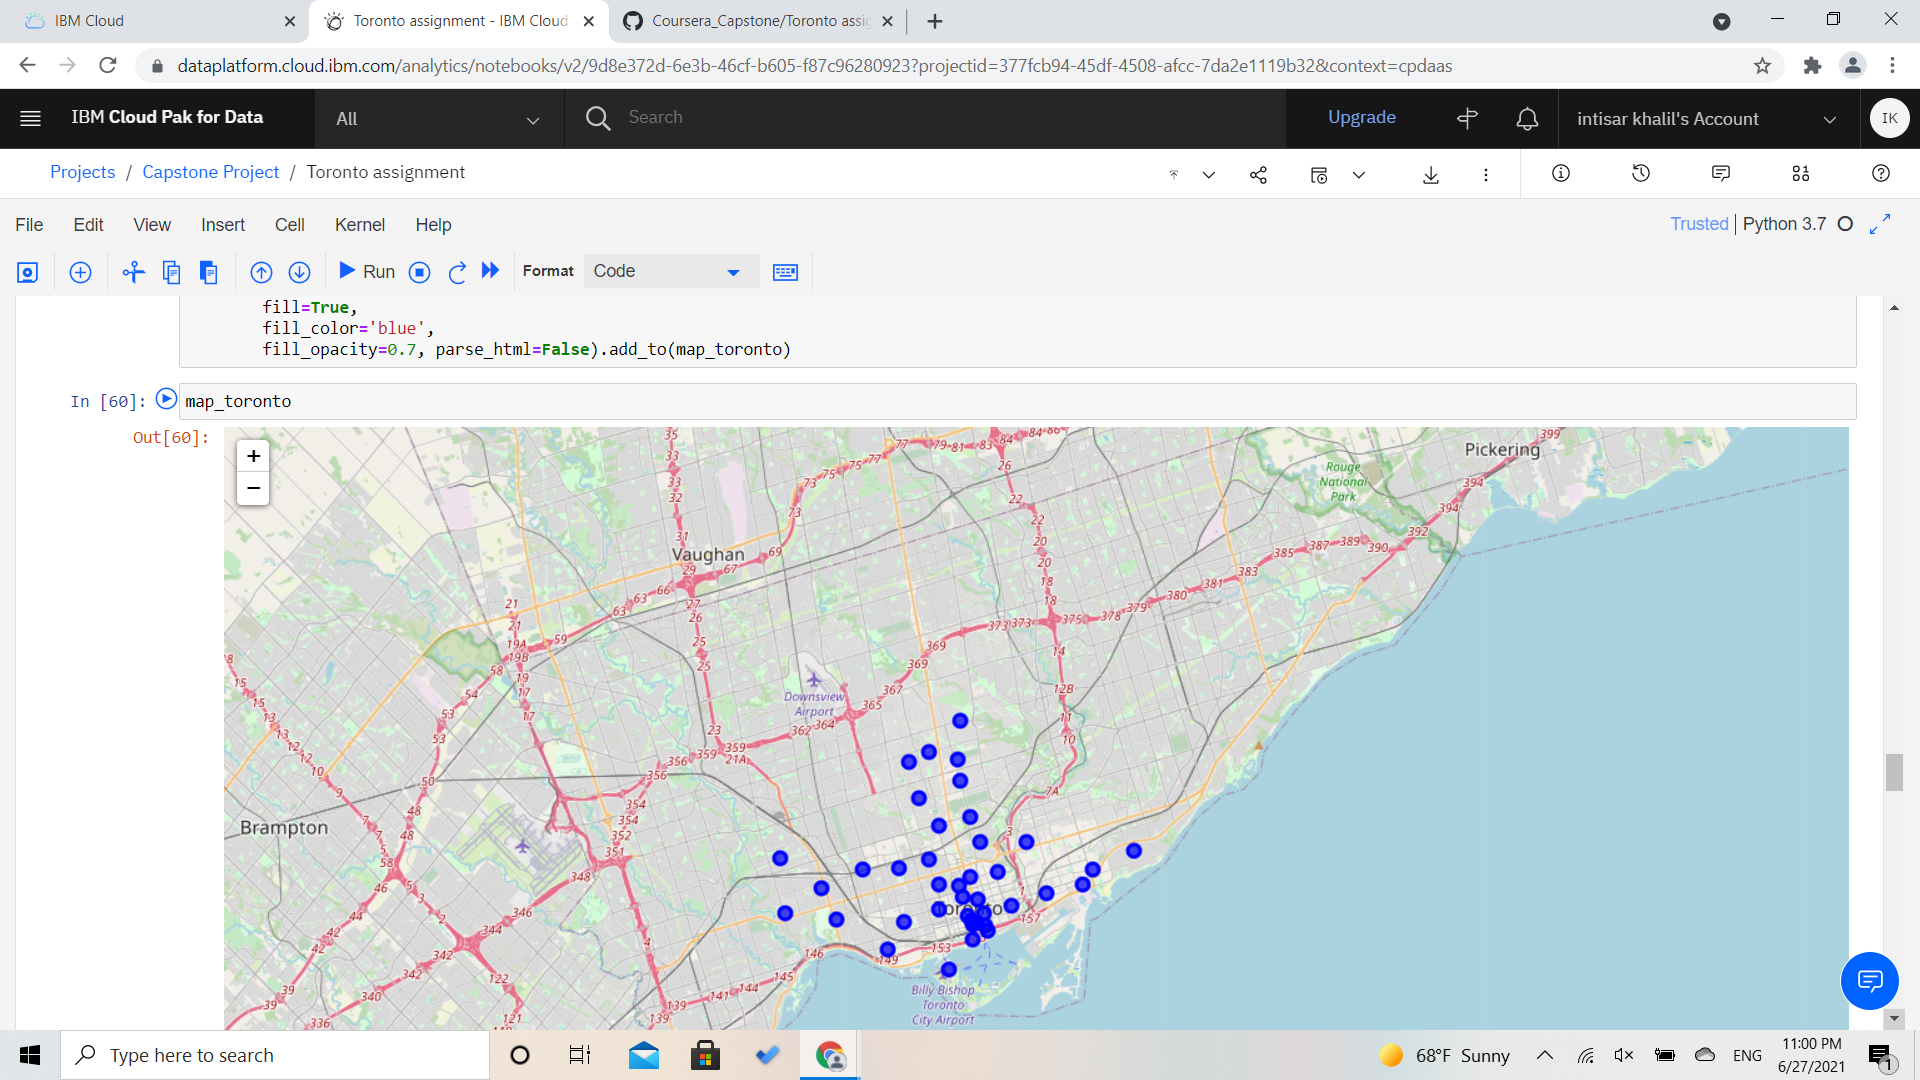

Make the Notebook Trusted to Load the Map: file->Trust Notebook

the map may not be visible on Github. check Readme file for the map

In [38]:
!pip install sklearn
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


## K-Means Clustring

In [39]:
from sklearn.cluster import KMeans
k=5
toronto_clustring=df4.drop(['Postcode', 'Borough', 'Neighbourhood'], 1)
Kmeans=KMeans(n_clusters=k, random_state=0).fit(toronto_clustring)
Kmeans.labels_
df4.insert(0, 'cluster Label', Kmeans.labels_)

In [40]:
df4

,cluster Label,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,0,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,0,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,4,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,0,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,4,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


Create Clusters Map

In [61]:
clusters_map=folium.Map(location=[43.651070, -79.347015], zoom_start=10)
#set color scheme for each cluster
x=np.arange(k)
ys=[i+x+(i*x)**2 for i in range(k)]
colors_array=cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]
# add circlemarker to the map
marker_colors=[]
for lat, lng, neighbourhood, cluster in zip(df4['Latitude'], df4['Longitude'], df4['Neighbourhood'], df4['cluster Label']):
    label=folium.Popup('Cluster'+str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label, 
    color=rainbow[cluster-1],
    fill=True,
    fill_color= rainbow[cluster-1],
    fill_opacity=0.7).add_to(clusters_map)

Make this Netebook trusted to load the Map:
File->trust Notebook

In [62]:
clusters_map

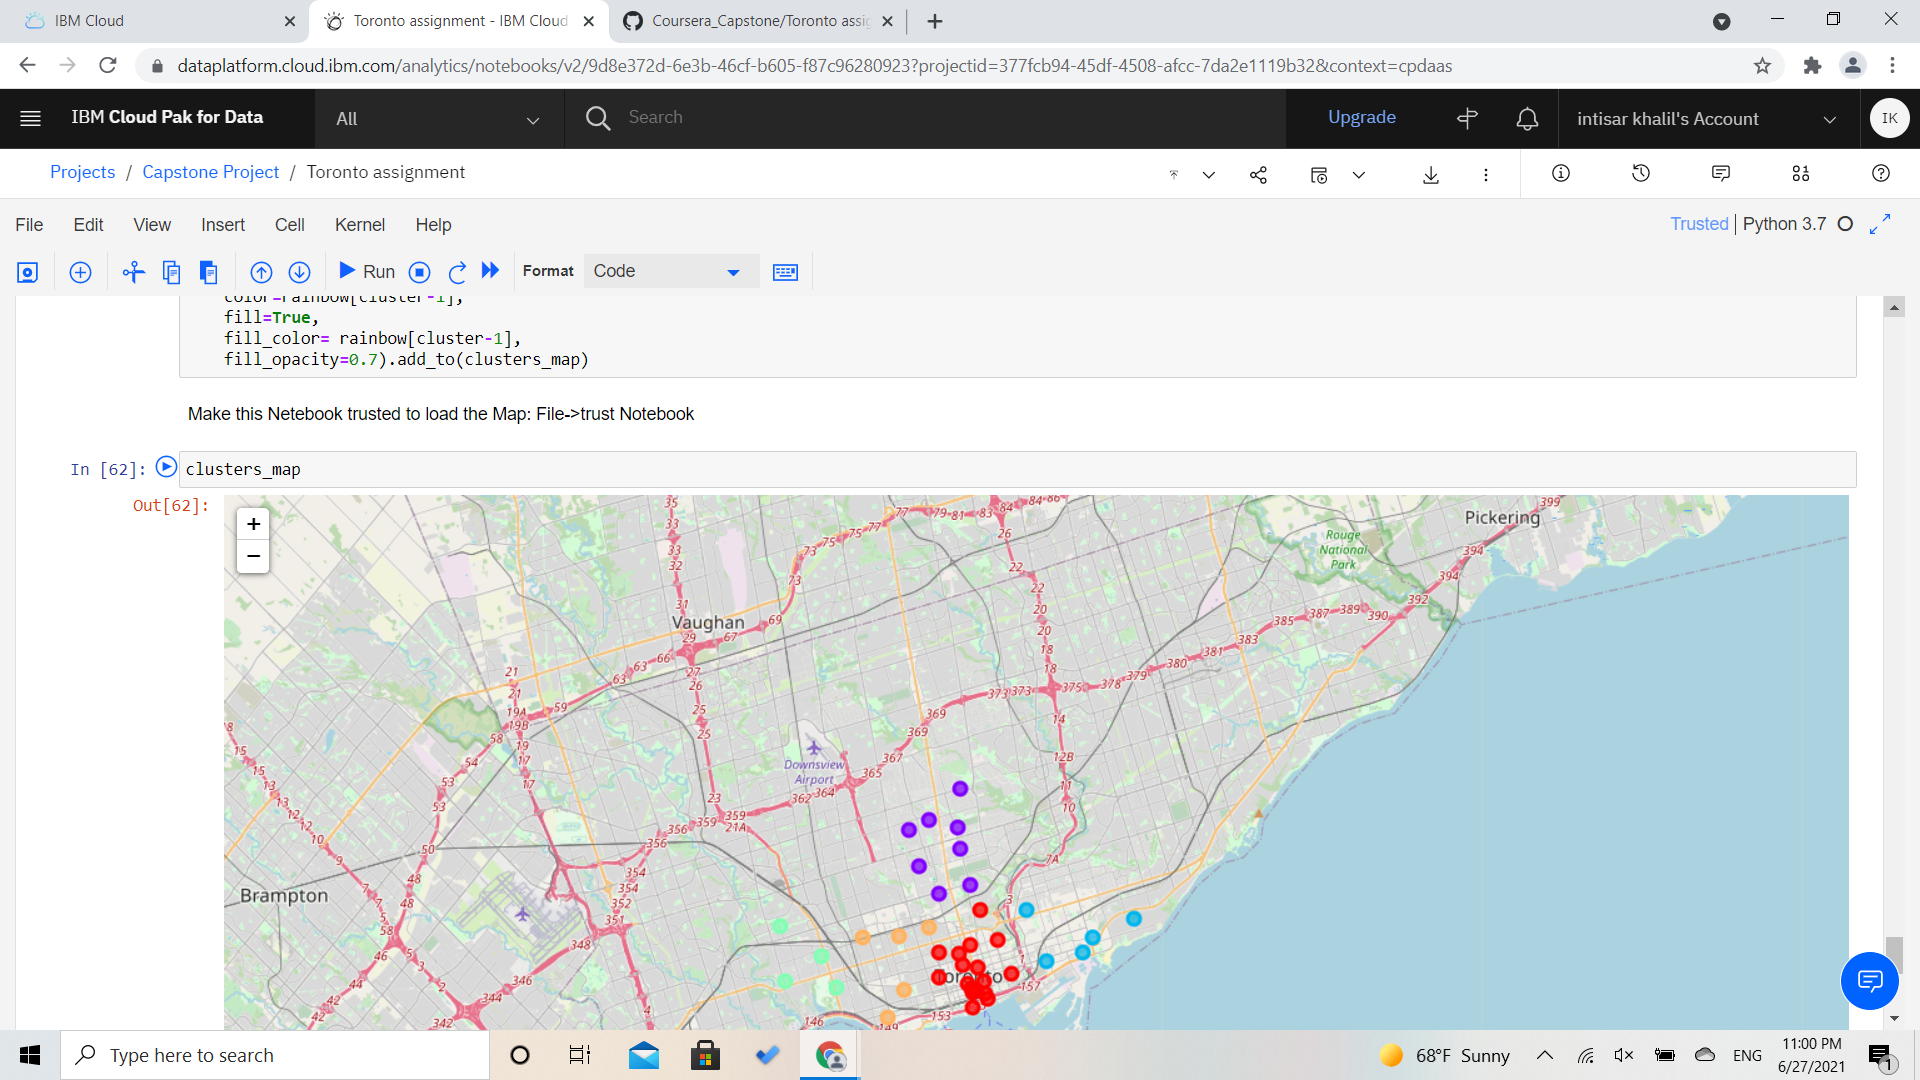